In [1]:
%load_ext autoreload
%autoreload 2

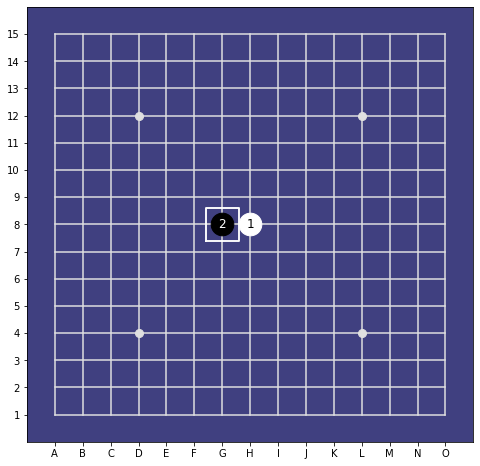

In [18]:
from aegomoku.utils import analyse_board

analyse_board(15, [('H', 8), (7,8)], policy=None)